In [1]:
# *LOGISTIC REGRESSION - HEART DISEASE PREDICTION

# ***Introduction
# World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. 
# Half the deaths in the United States and other developed countries are due to cardio vascular diseases. 
# The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in 
# turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as 
# predict the overall risk using logistic regression


# Data Preparation

# ***Source
# The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the 
# town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future 
# coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.


# Variables
# Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

# ***Demographic:
# • Sex: male or female(Nominal)
# • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age
# is continuous)

# ***Behavioral
# • Current Smoker: whether or not the patient is a current smoker (Nominal)
# • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one
# can have any number of cigarettes, even half a cigarette.)

# ***Medical( history)
# • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
# • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
# • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
# • Diabetes: whether or not the patient had diabetes (Nominal)

# ***Medical(current)
# • Tot Chol: total cholesterol level (Continuous)
# • Sys BP: systolic blood pressure (Continuous)
# • Dia BP: diastolic blood pressure (Continuous)
# • BMI: Body Mass Index (Continuous)
# • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
# • Glucose: glucose level (Continuous)

# ***Predict variable (desired target)
# • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading csv
heart_data = pd.read_csv('framingham.csv')
heart_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
heart_data.shape

(4238, 16)

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
heart_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Step-2 Data Cleaning 

### Data Substitutions and make a meaning full values for our EDA

In [7]:
heart_data = heart_data.rename(columns = {'male':'Sex'})

In [8]:
heart_data['Sex'] = heart_data['Sex'].apply(lambda x: 'Male' if x == 0 else 'Female')# male=0 ,female=1

In [9]:
heart_data['currentSmoker'] = heart_data['currentSmoker'].apply(lambda x :'Yes' if x==1 else 'No') #yes=1,no=0

In [10]:
heart_data['prevalentStroke']=heart_data['prevalentStroke'].apply(lambda x :'Yes' if x==1 else 'No') # yes=1,no=0

In [11]:
heart_data['BPMeds']=heart_data['BPMeds'].apply(lambda x :'Yes' if x==1 else 'No')#yes=1,no=0

In [12]:
heart_data['prevalentHyp']=heart_data['prevalentHyp'].apply(lambda x :'Yes' if x==1 else 'No')#yes=1,no=0

In [13]:
heart_data['diabetes']=heart_data['diabetes'].apply(lambda x :'Yes' if x==1 else 'No')#yes=1,no=0

In [14]:
heart_data['TenYearCHD']=heart_data['TenYearCHD'].apply(lambda x :'Yes' if x==1 else 'No')#yes=1,no=0

In [15]:
heart_data.head()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Female,39,4.0,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Male,46,2.0,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Female,48,1.0,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Male,61,3.0,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes
4,Male,46,3.0,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No


### Missing Value,NaN value Treatement for accuracy

In [16]:
percent_missing =(heart_data.isnull().sum() *100)/len(heart_data)
percent_missing

Sex                0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

In [17]:
heart_data.isnull().sum()

Sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [18]:
# education is irrevelant to our analysis hence we are dropping it
heart_data = heart_data.drop('education',axis=1)

In [19]:
heart_data['cigsPerDay'].value_counts()

0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: cigsPerDay, dtype: int64

In [20]:
heart_data['cigsPerDay'].fillna(heart_data['cigsPerDay'].mode()[0] ,inplace = True)

In [21]:
heart_data['totChol'].value_counts()

240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
392.0     1
405.0     1
359.0     1
398.0     1
119.0     1
Name: totChol, Length: 248, dtype: int64

In [22]:
heart_data['totChol'].fillna(heart_data['totChol'].mode()[0] ,inplace = True)

In [23]:
heart_data.isnull().sum()

Sex                  0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [24]:
heart_data['BMI'].fillna(heart_data['BMI'].mode()[0] ,inplace = True)

In [25]:
heart_data['glucose'].value_counts()

75.0     193
77.0     167
73.0     156
80.0     152
70.0     152
        ... 
386.0      1
155.0      1
147.0      1
205.0      1
260.0      1
Name: glucose, Length: 143, dtype: int64

In [26]:
heart_data['glucose'].fillna(heart_data['glucose'].mode()[0] ,inplace = True)

In [27]:
heart_data['heartRate'].value_counts()

75.0     563
80.0     385
70.0     305
60.0     231
85.0     227
        ... 
47.0       1
130.0      1
140.0      1
51.0       1
46.0       1
Name: heartRate, Length: 73, dtype: int64

In [28]:
heart_data['heartRate'].fillna(heart_data['heartRate'].mode()[0] ,inplace = True)

In [29]:
heart_data.isnull().sum()

Sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### if we want we can leave the NaN values and do our predictions It won't affect that much.But to predict more accurately I treated the missing value first.

## Step -3 Data Visualization

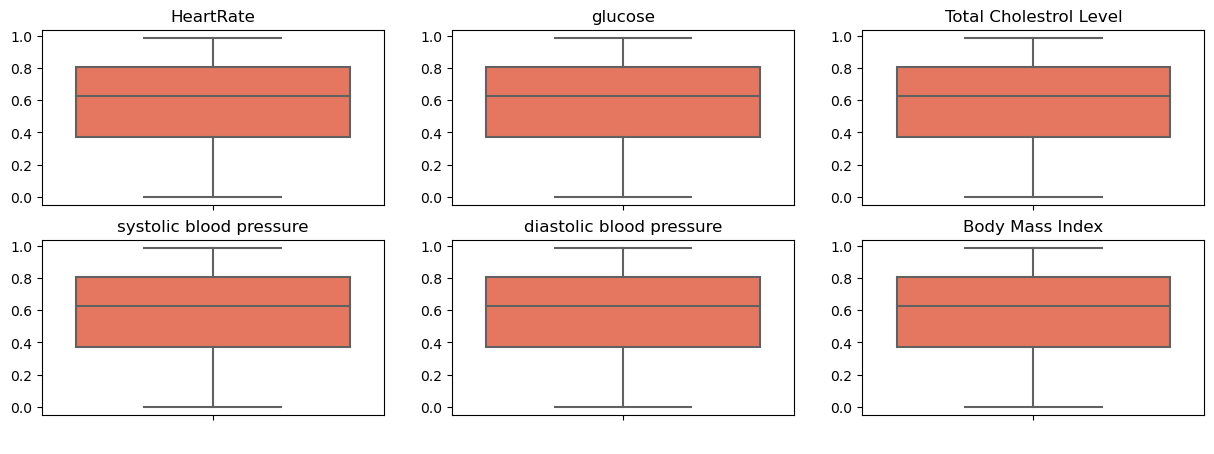

In [30]:
# Boxplot for all continous variables [Numerical Variables]
plt.figure(figsize=(15,5))

plt.subplot(2,3,1)
sns.boxplot(heart_data['heartRate'].describe(),palette = 'Reds',y=[0.0,0.50,0.75,0.99]).set(title="HeartRate" , 
                                                                                             xlabel=" ")

plt.subplot(2,3,2)
sns.boxplot(heart_data['glucose'].describe(),palette = 'Reds',y=[0.0,0.50,0.75,0.99]).set(title="glucose" , 
                                                                                             xlabel="  ")

plt.subplot(2,3,3)
sns.boxplot(heart_data['totChol'].describe(),palette = 'Reds',y=[0.0,0.50,0.75,0.99]).set(title="Total Cholestrol Level" , 
                                                                                             xlabel="  ")

plt.subplot(2,3,4)
sns.boxplot(heart_data['sysBP'].describe(),palette = 'Reds',y=[0.0,0.50,0.75,0.99]).set(title="systolic blood pressure" , 
                                                                                             xlabel=" ")

plt.subplot(2,3,5)
sns.boxplot(heart_data['diaBP'].describe(),palette = 'Reds',y=[0.0,0.50,0.75,0.99]).set(title="diastolic blood pressure" , 
                                                                                             xlabel=" ")

plt.subplot(2,3,6)
sns.boxplot(heart_data['BMI'].describe(),palette = 'Reds',y=[0.0,0.50,0.75,0.99]).set(title="Body Mass Index" , 
                                                                                             xlabel="  ")

plt.show()

#### Overall if we see Heartrate ,gulcose , Total Cholestrol Level ,systolic or diastolic blood pressure and Body Mass Index all are very well maintain the same levels, it ranges in between 40% to 80% .So we can say a patient is having a heart problem he is defenitely have these level nearly or more than 80%

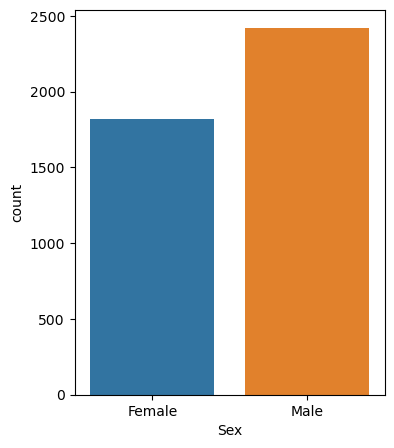

In [31]:
plt.figure(figsize=(4,5))
sns.countplot(heart_data,x = heart_data.Sex)
plt.xlabel('Sex')
plt.show()

#### Males are more suspected to heart attack as compared to females.

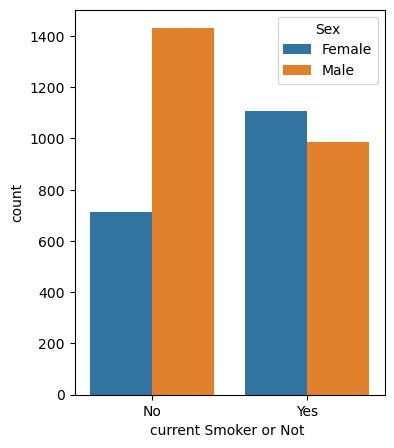

In [32]:
plt.figure(figsize=(4,5))
sns.countplot(heart_data,x = heart_data.currentSmoker , hue = heart_data.Sex)
plt.xlabel('current Smoker or Not ')
plt.show()

#### Maximum men were currently smoking as compared to females

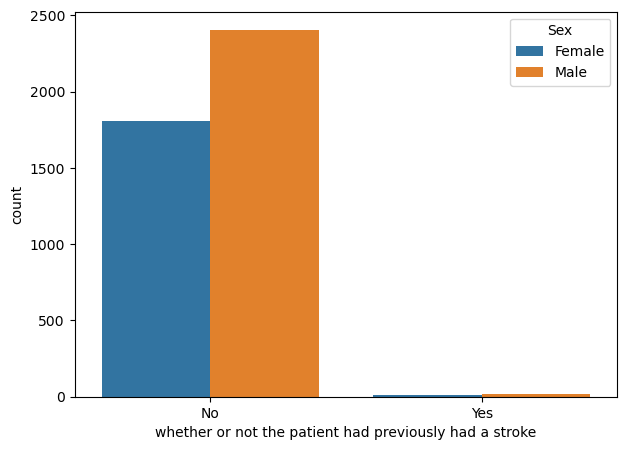

In [33]:
plt.figure(figsize=(7,5))
sns.countplot(heart_data,x = heart_data.prevalentStroke , hue = heart_data.Sex)
plt.xlabel('whether or not the patient had previously had a stroke')
plt.show()

#### Very very less people got a stroke previously.Both male and female have a equal chances of getting a stroke previously.

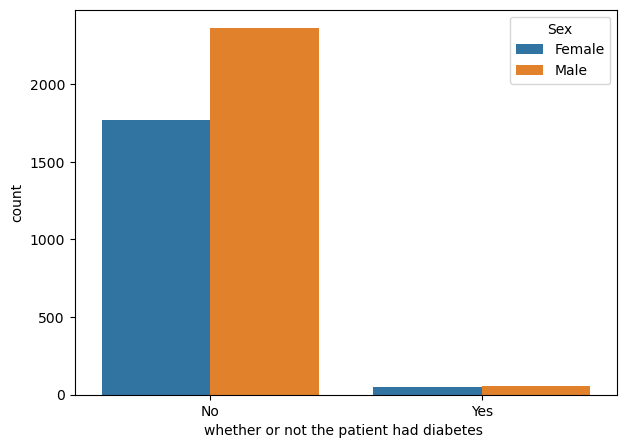

In [34]:
plt.figure(figsize=(7,5))
sns.countplot(heart_data,x = heart_data.diabetes , hue = heart_data.Sex)
plt.xlabel('whether or not the patient had diabetes ')
plt.show()

#### Male and Female are having equal chances of getting diabetes.

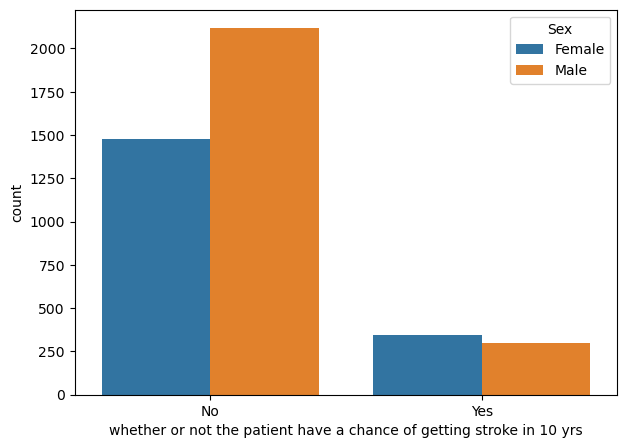

In [35]:
plt.figure(figsize=(7,5))
sns.countplot(heart_data,x = heart_data.TenYearCHD , hue = heart_data.Sex)
plt.xlabel('whether or not the patient have a chance of getting stroke in 10 yrs')
plt.show()

#### More or less Male or Female are both equally likely to get a stroke in 10 yrs.If they don't opt a healthy lifestyle.

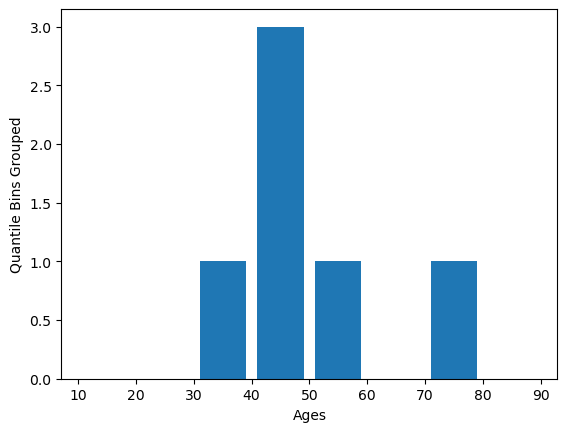

In [36]:
bins = [10,20,30,40,50,60,70,80,90]
plt.hist(heart_data['age'].describe(), bins, histtype='bar', rwidth=0.8)
plt.xlabel('Ages')
plt.ylabel('Quantile Bins Grouped')
plt.show()

#### Person having a age in between 40-50 are having more chances of getting a heart attack , Than people in between 70-80.

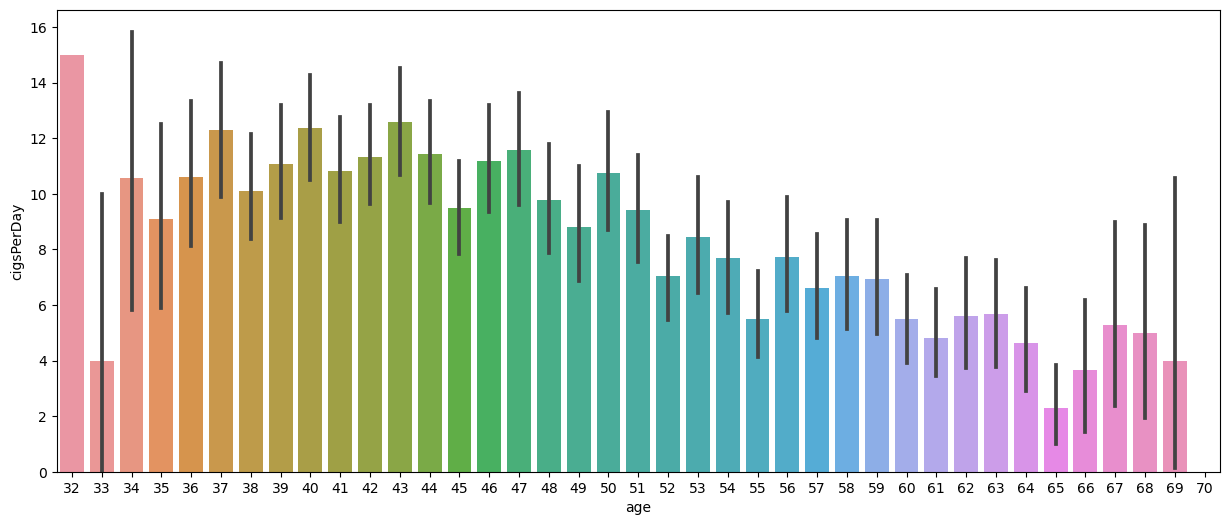

In [37]:
plt.figure(figsize=(15,6))
sns.barplot(x='age',y='cigsPerDay',data=heart_data)
plt.show()

#### From this we can see that youger people are more addicted to ciggerates than oder people.Hence they get a maximum chance of getting heart problems in early life.

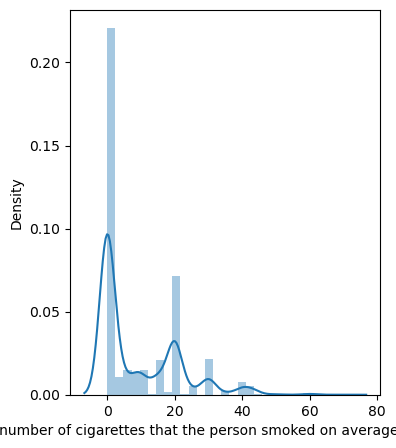

In [38]:
plt.figure(figsize=(4,5))
sns.distplot(heart_data.cigsPerDay)
plt.xlabel('the number of cigarettes that the person smoked on average in one day.')
plt.show()

#### On an average a person is taking 10 ciggrates in a day as per analysis,which is not at a good sign.

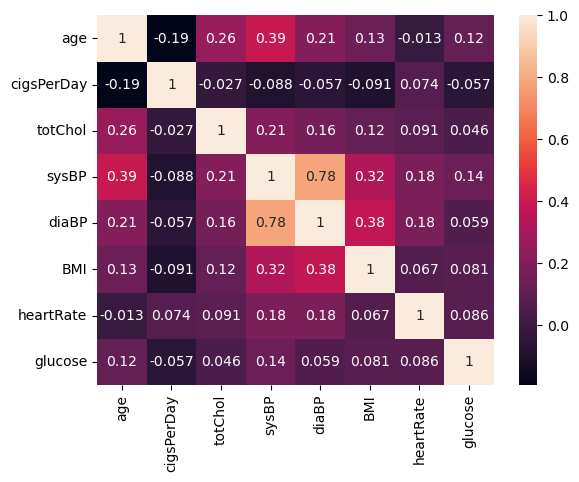

In [39]:
sns.heatmap(heart_data.corr(),annot = True)
plt.show()

In [40]:
heart_data.head(10)

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Female,39,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Male,46,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Female,48,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Male,61,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes
4,Male,46,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,No
5,Male,43,No,0.0,No,No,Yes,No,228.0,180.0,110.0,30.30,77.0,99.0,No
6,Male,63,No,0.0,No,No,No,No,205.0,138.0,71.0,33.11,60.0,85.0,Yes
7,Male,45,Yes,20.0,No,No,No,No,313.0,100.0,71.0,21.68,79.0,78.0,No
8,Female,52,No,0.0,No,No,Yes,No,260.0,141.5,89.0,26.36,76.0,79.0,No
9,Female,43,Yes,30.0,No,No,Yes,No,225.0,162.0,107.0,23.61,93.0,88.0,No


## Step-4 Data Preparation for Model Building

In [41]:
# yes=1,no=0,  # male=0 ,female=1
varlist = ['currentSmoker','prevalentStroke','BPMeds','prevalentHyp','diabetes','TenYearCHD']

In [42]:
heart_data['currentSmoker']=heart_data['currentSmoker'].map({'Yes':1,'No':0})

In [43]:
heart_data['prevalentStroke']=heart_data['prevalentStroke'].map({'Yes':1,'No':0})

In [44]:
heart_data['BPMeds']=heart_data['BPMeds'].map({'Yes':1,'No':0})

In [45]:
heart_data['prevalentHyp']=heart_data['prevalentHyp'].map({'Yes':1,'No':0})

In [46]:
heart_data['diabetes']=heart_data['diabetes'].map({'Yes':1,'No':0})

In [47]:
heart_data['TenYearCHD']=heart_data['TenYearCHD'].map({'Yes':1,'No':0})

In [48]:
heart_data['Sex']=heart_data['Sex'].map({'Female':1,'Male':0})

In [49]:
heart_data.head()

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Checking for outliers

In [50]:
# Checking for outliers in the continuous variables
check_for_outliers = heart_data[['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

In [51]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
check_for_outliers.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,8.941482,236.760264,132.352407,82.893464,25.785814,75.878716,81.328929
std,11.902399,44.327866,22.038097,11.910850,4.078100,12.025185,22.924837
min,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,0.000000,206.000000,117.000000,75.000000,23.050000,68.000000,72.000000
50%,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,77.000000
75%,20.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000
90%,25.000000,292.000000,162.000000,98.000000,30.763000,92.000000,97.000000
95%,30.000000,312.000000,175.000000,104.575000,32.771500,98.000000,107.000000
99%,43.000000,353.630000,200.000000,118.000000,38.952600,110.000000,170.000000


#### From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

## Step-4 TEST and TRAIN Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Putting feature variable to X
X = heart_data.drop(['TenYearCHD'], axis=1)

X.head()

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [54]:
# Putting response variable to y
y = heart_data['TenYearCHD']

y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [76]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

X_train[['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']] = scaler.fit_transform(X_train[['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']])

X_train.head()

,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1793,1,56,1,0.912076,0,0,0,0,-1.063380,-0.564153,-1.086904,-1.086667,-0.468457,-0.482810
177,0,61,1,0.912076,0,0,0,0,-0.173743,-0.474385,0.002076,-0.093275,0.195237,-0.860539
260,1,52,0,-0.756936,0,0,1,1,0.070907,0.602832,0.504682,-0.304740,-0.966228,-0.356900
3076,0,43,1,0.077570,0,0,0,0,0.715894,0.288644,1.091056,-0.356377,0.112275,-0.440840
1889,0,65,0,-0.756936,0,0,0,0,1.138471,0.602832,0.965405,0.174744,0.361161,-0.314930


In [58]:
### Checking the TenYearCHD Rate
hdata = (sum(heart_data['TenYearCHD'])/len(heart_data['TenYearCHD'].index))*100
hdata

15.19584709768759

We have almost 15% possiblity of patients getting heart problems.

In [77]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
parameter ={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300,400,500]}

In [80]:
classifier_regressor = GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [81]:
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [82]:
print(classifier_regressor.best_params_)

{'C': 5, 'max_iter': 500, 'penalty': 'l2'}


In [83]:
print(classifier_regressor.best_score_)

0.8540100271972111


In [84]:
### prediction
y_pred = classifier_regressor.predict(X_test)

In [85]:
### accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [86]:
score = accuracy_score(y_pred,y_test)

In [87]:
print(score)

0.8427672955974843


In [88]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      1251
           1       0.05      0.48      0.09        21

    accuracy                           0.84      1272
   macro avg       0.52      0.66      0.50      1272
weighted avg       0.97      0.84      0.90      1272

